# Homework 2: Ridge Regression and Gradient Descent

## Name: Sujeong Cha / NetID: sjc433

In [1]:
# import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Computing Risk 1.(a)

$E[x_i^2] = (0*\frac{1}{5})+(1*\frac{2}{5})+(4*\frac{2}{5})=2$

$E[||x||_2^2] = E[x_1^2+\cdots+x_n^2] = E[x_1^2] + \cdots + E[x_n^2] = 2n$

$\therefore E[||x||_2^2] = 2n$

## Computing Risk 1.(b)

When $E[||x||\infty]=0$: every element should be zero $\rightarrow$ $P(0)=(\frac{1}{5})^n$

When $E[||x||\infty]=1$: every element should be -1, 0, or 1 $\rightarrow$ $P(1)=(\frac{3}{5})^n - (\frac{1}{5})^n$

When $E[||x||\infty]=2$: other than above cases $\rightarrow$ $P(2)=1-(\frac{3}{5})^n$

$E[||x||\infty] = (0*(\frac{1}{5})^n)+(1*((\frac{3}{5})^n - (\frac{1}{5})^n))+(2*(1-(\frac{3}{5})^n))$

$\therefore E[||x||\infty] = 2 - (\frac{1}{5})^n - (\frac{3}{5})^n$

## Computing Risk 1.(c)

$\Sigma=\begin{pmatrix} 2 \ 0 \ \cdots \ 0 \\ 
                        0 \ 2 \ \cdots \ 0 \\
                        0 \ 0 \ \ddots \ 0 \\
                        0 \ 0 \ \cdots \ 2 \end{pmatrix}$ 
                        
The diagonal entries are variance of $x_i$ which is eqaul to 2. $(Var(x_i)=E(x^2)-E(x)^2=2-0=2)$

The off-diagonal entries are all zero because $x_i, x_j$ have covariance of zero (i.i.d. samples). 

## Computing Risk 2.(a) 

$E[(a-y)^2]=E[a^2-2ay+y^2]=E(a^2)-2E(ay)+E(y^2)=a^2-2aE(y)+E(y^2)$

Taking derivative on $a$ and setting it equal to zero, $2a-2E(y)=0$

$\therefore a^*=E(y)$

Substituting $a^*=E(y)$ to the expected loss, $E[(a^*-y)^2]=E(y)^2-2E(y)^2+E(y^2)=E(y)^2-2E(y)^2+Var(y)+E(y)^2$

$\therefore E[(a^*-y)^2]=Var(y)$

## Computing Risk 2.(b).i

$E[(a-y)^2|x]=E[a^2-2ay+y^2|x]=E[a^2|x]-E[2ay|x]+E[y^2|x]=a^2-2aE(y|x)+E(y^2|x)$

Taking derivative on $a$ and setting it equal to zero, $2a-2E(y|x)=0$

$\therefore a^*=f^*(x)=E(y|x)$

## Computing Risk 2.(b).ii

[Left Side] 

$E[(f^*(x)-y)^2]=E[(E(y|x)-y)^2]=E[E(y|x)^2-2yE(y|x)+y^2]$

$=E[E(y|x)E(y|x)]-2E[y E(y|x)]+E[y^2]=E[E(y|x)]E[E(y|x)]-2E[y]E[E(y|x)]+E[y^2]=E^2(y)-2E^2(y)+E[y^2]=Var(y)$

[Right Side]

The smallest value that the right side can take is $Var(y)$ which is the Bayes risk found in 2.(a).

$\therefore E[(f^*(x)-y)^2] \leq E[(f(x)-y)^2]$ 

## Linear Regression 1.(a)

In [2]:
#######################################
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test - test set, a 2D numpy array of size (num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    train_normalized = np.empty(train.shape)
    test_normalized = np.empty(test.shape)
    for i, column in enumerate(train.T):
        if max(column) == min(column):
            train_normalized.T[i] = column
            test_normalized.T[i] = test.T[i]
        else: 
            train_normalized_col = (column - min(column)) / (max(column) - min(column))
            test_normalized_col = (test.T[i] - min(column)) / (max(column) - min(column))
            train_normalized.T[i] = train_normalized_col
            test_normalized.T[i] = test_normalized_col  
    return train_normalized, test_normalized

## Linear Regression 2.(a) 

$J(\theta)=\cfrac{1}{m}(X\theta-y)^T(X\theta-y)$

## Linear Regression 2.(b)

$\displaystyle\nabla J(\theta)=\cfrac{2X^TX\theta-2X^Ty}{m}$

## Linear Regression 2.(c)

$J(\theta+\displaystyle \eta h)-J(\theta)=\eta h^T \nabla J(\theta)$

## Linear Regression 2.(d)

$\theta_i=\theta_{i-1}-\eta_{i-1}\nabla J(\theta_{i-1})$

## Linear Regression 2.(e)

In [3]:
#######################################
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    H = X.dot(theta)-y
    loss = ((H.T).dot(H)) / X.shape[0]
    return loss

## Linear Regression 2.(f)

In [4]:
#######################################
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    grad = (2 * ((X.T).dot(X).dot(theta)-(X.T).dot(y))) / X.shape[0]
    return grad

## Linear Regression 3.(a)

In [5]:
#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    for i in range(num_features):
        e = np.zeros(num_features)
        e[i] = 1
        d_i = (compute_square_loss(X, y, theta + epsilon * e) - compute_square_loss(X, y, theta - epsilon * e)) / (2 * epsilon)
        approx_grad[i] = d_i
        
    return np.linalg.norm(true_gradient-approx_grad) < tolerance   

## Linear Regression 4.(a)

In [6]:
#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    
    for i in range(1, num_step+1):
        theta = theta - alpha * compute_square_loss_gradient(X, y, theta)
        if grad_check == True: 
            if grad_checker(X, y, theta) == False: raise ValueError('Wrong Gradient')
        loss = compute_square_loss(X, y, theta)
        theta_hist[i] = theta
        loss_hist[i] = loss
        
    return theta_hist, loss_hist     

## Linear Regression 4.(b)

In [7]:
df = pd.read_csv('ridge_regression_dataset.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term

Split into Train and Test
Scaling all to [0, 1]


In [8]:
stepsize = [0.5, 0.1, 0.05, 0.01] 
losses = np.empty((4, 1001))
for i, s in enumerate(stepsize):
    th, lh = batch_grad_descent(X_train, y_train, alpha = s)
    losses[i] = lh

C:\Users\sujeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\sujeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


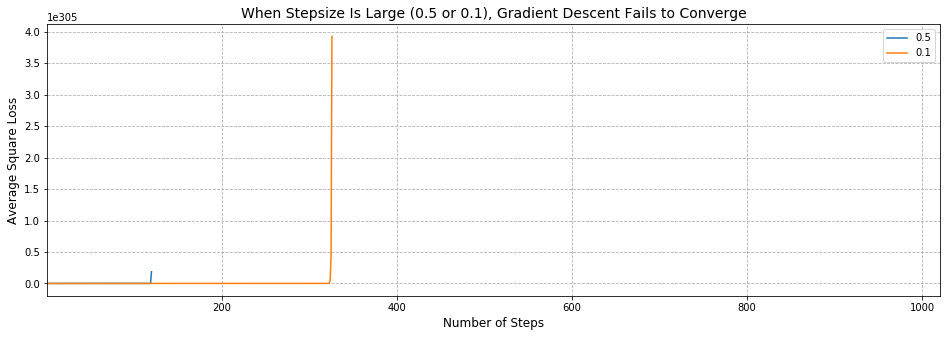

In [9]:
plt.figure(figsize=(16,5))
plt.grid('gray', linestyle = '--')
plt.plot(losses[0])
plt.plot(losses[1])
plt.legend(stepsize, loc='upper right')
plt.xlim(1, 1020)
plt.xlabel("Number of Steps", fontsize=12)
plt.ylabel("Average Square Loss", fontsize=12)
plt.title("When Stepsize Is Large (0.5 or 0.1), Gradient Descent Fails to Converge", fontsize=14)
plt.show()

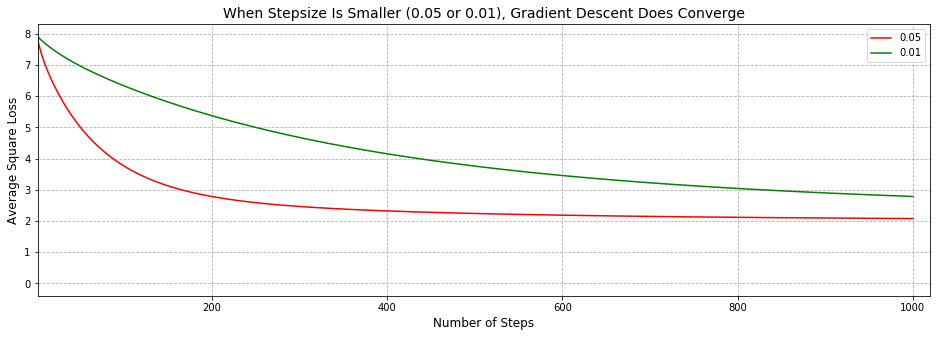

In [10]:
plt.figure(figsize=(16,5))
plt.grid('gray', linestyle = '--')
plt.plot(losses[2], c='red')
plt.plot(losses[3], c='green')
plt.legend(stepsize[2:], loc='upper right')
plt.xlim(1, 1020)
plt.xlabel("Number of Steps", fontsize=12)
plt.ylabel("Average Square Loss", fontsize=12)
plt.title("When Stepsize Is Smaller (0.05 or 0.01), Gradient Descent Does Converge", fontsize=14)
plt.show()

When we choose stepsize to be too large (i.e. 0.5 or 0.1), the gradient descent might fail to converge (Top Graph). On the other hand, if we decrease the stepsize (i.e. 0.05 or 0.01), the gradient descent does converge (Bottom Graph). Thus, it is crucial to choose an appropriate stepsize.

## Ridge Regression 1

$\nabla J(\theta)=\cfrac{2X^TX\theta-2X^Ty}{m}+2\lambda\theta$

$\theta_i=\theta_{i-1}-\eta_{i-1}\nabla J(\theta_{i-1})$

## Ridge Regression 2

In [11]:
#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    grad = ((2 * (np.dot((X.T).dot(X), theta)-(X.T).dot(y))) / X.shape[0]) + (2 * lambda_reg * theta)
    return grad

## Ridge Regression 3

In [12]:
#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    
    for i in range(1, num_step+1):
        theta = theta - alpha * compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
        loss = compute_square_loss(X, y, theta)
        theta_hist[i] = theta
        loss_hist[i] = loss
    
    return theta_hist, loss_hist

## Ridge Regression 4

If we make the bias term B arbitrarily large (say, 100000) compared to the actual intercept value (10), the weight coefficient for the bias term will be very small ($10^{-4}$). Thus, the penalizing parameter $\lambda$ does not have much effect on the weight coefficient for the bias term, resulting in weak regularization.

## Ridge Regression 5

In [13]:
lambda_search = np.logspace(-7, 2)

lambda_losses_train = []
lambda_losses_test = []
last_theta = []

for lamb_ in lambda_search:
    th, lh = regularized_grad_descent(X_train, y_train, lambda_reg=lamb_)
    last_theta.append(th[-1])
    lambda_losses_train.append(lh[-1])
    lambda_losses_test.append(compute_square_loss(X_test, y_test, th[-1]))    

C:\Users\sujeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
C:\Users\sujeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in subtract


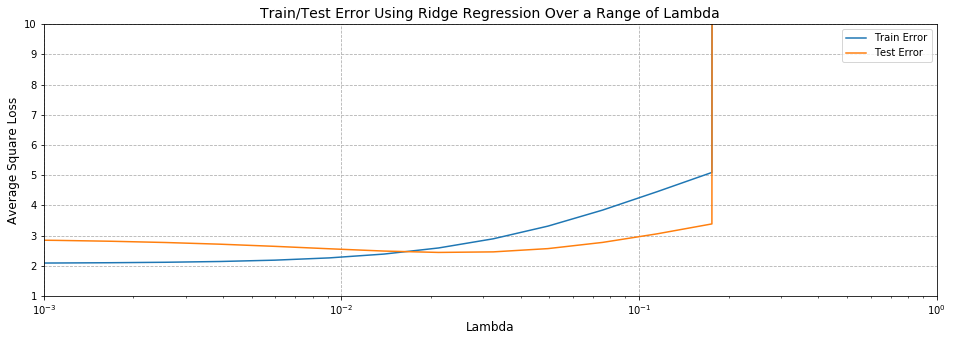

In [14]:
plt.figure(figsize=(16,5))
plt.grid('gray', linestyle = '--')
plt.semilogx(lambda_search, lambda_losses_train)
plt.semilogx(lambda_search, lambda_losses_test)
plt.xlim(10**-3, 10**0)
plt.ylim(1, 10)
plt.legend(['Train Error', 'Test Error'])
plt.xlabel("Lambda", fontsize=12)
plt.ylabel("Average Square Loss", fontsize=12)
plt.title("Train/Test Error Using Ridge Regression Over a Range of Lambda", fontsize=14)
plt.show()

In [16]:
opt_theta = last_theta[lambda_losses_test.index(min(lambda_losses_test))]
print("Lambda that gives the minimum test error", round(lambda_search[lambda_losses_test.index(min(lambda_losses_test))],2))
print("Theta that minimizes the loss function: \n", opt_theta)

Lambda that gives the minimum test error 0.02
Theta that minimizes the loss function: 
 [-1.17281459  0.49936076  1.29709809  2.3421281  -1.78296623 -0.66274207
 -0.76047434 -0.76047434  0.75172252  1.29990716  2.39998043 -0.50477409
 -1.16914343 -3.74828243  1.42628956  2.34029036  1.20851405  0.366211
 -0.07632285 -0.07632285 -0.07632285 -0.01960493 -0.01960493 -0.01960493
  0.00495568  0.00495568  0.00495568  0.0170925   0.0170925   0.0170925
  0.02406644  0.02406644  0.02406644 -0.06885674 -0.06885674 -0.06885674
  0.06667305  0.06667305  0.06667305  0.05601909  0.05601909  0.05601909
  0.05122337  0.05122337  0.05122337  0.04860156  0.04860156  0.04860156
 -1.16577029]


## Ridge Regression 6

In practice, I would use **RandomizedSearchCV** function in scikit-learn to find the optimal combination of parameter (lambda, stepsize, etc) and the corresponding theta. We could also use GirdSearchCV but it can be time-wise inefficient because it searches through every possible combination of parameters. Instead, RandomizedSearchCV checks for only parts of the combinations, reducing the computing time albeit not producing the lowest-possible error.

## Stochastic Gradient Descent 1

$f_i(\theta)=(h_\theta(x_i)-y_i)^2+\lambda\theta^T\theta$

## Stochastic Gradient Descent 2

$E[\nabla f_i(\theta)]=\cfrac{1}{m}\sum_{i=1}^m \nabla f_i(\theta) = \nabla \cfrac{1}{m} \sum_{i=1}^m f_i(\theta)= \nabla J(\theta)$

## Stochastic Gradient Descent 3

$\theta_i=\theta_{i-1}-\eta_{i-1}\nabla f_{i-1}(\theta)$

## Stochastic Gradient Descent 4

In [17]:
#######################################
### Stochastic gradient descent
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, alpha_type='fixed'):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
 
    C=alpha
    t=1
    for e in range(num_epoch):
        s = np.arange(num_instances)
        np.random.shuffle(s)
        for i in s:
            X_ = X[i]
            y_ = y[i]

            if alpha_type == 'fixed': alpha_ = C
            if alpha_type == 'C/t': alpha_ = C / t
            if alpha_type == 'C/sqrt(t)': alpha_ = C / np.sqrt(t)

            theta = theta - alpha_ * compute_regularized_square_loss_gradient(X_, y_, theta, lambda_reg)
            loss = compute_square_loss(X, y, theta)
            theta_hist[e][i] = theta
            loss_hist[e][i] = loss            
            t += 1
 
    return theta_hist, loss_hist

## Stochastic Gradient Descent 5

In [30]:
step_size = [0.1, 0.05, 0.005]
step_type = ['fixed', 'C/t', 'C/sqrt(t)']

comb_last_theta = {}
comb_losses_train = {}
last_losses = []

for size in step_size:
    losses_train = {}
    last_theta = {}
    for steptype in step_type:
        th, lh = stochastic_grad_descent(X_train, y_train, alpha = size, lambda_reg=10**-2, num_epoch=1000, alpha_type=steptype)
        last_theta[steptype] = th[:,-1]
        losses_train[steptype] = lh[:,-1]
        last_losses.append(lh[-1, -1])
    comb_last_theta[size] = last_theta
    comb_losses_train[size] = losses_train

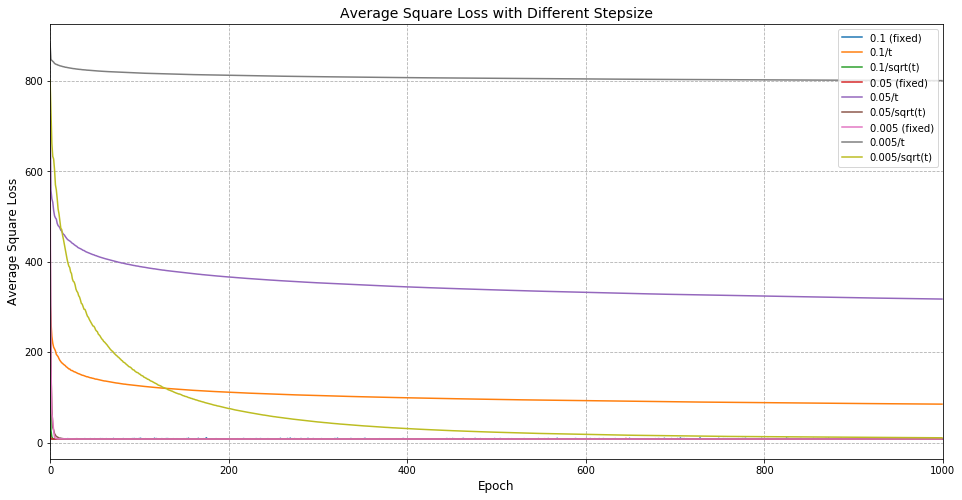

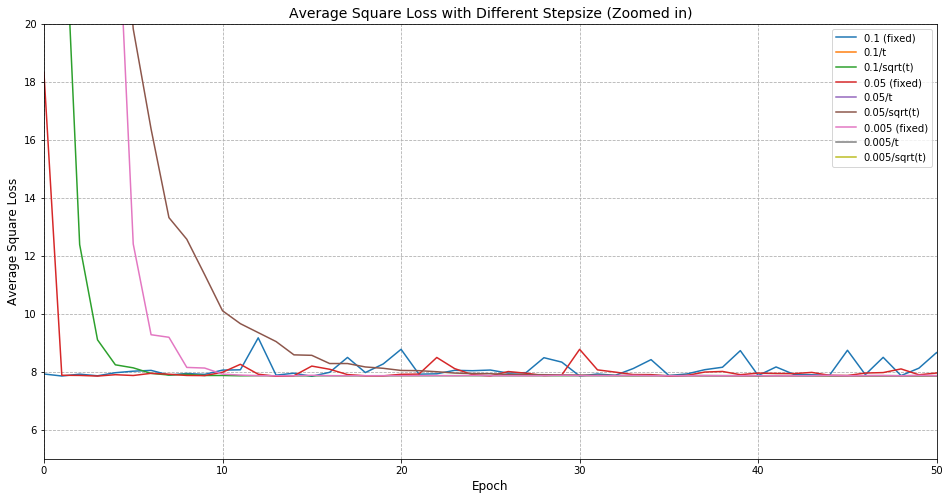

In [19]:
plt.figure(figsize=(16, 8))
plt.grid('gray', linestyle = '--')
plt.plot(comb_losses_train[0.1]['fixed'])
plt.plot(comb_losses_train[0.1]['C/t'])
plt.plot(comb_losses_train[0.1]['C/sqrt(t)'])
plt.plot(comb_losses_train[0.05]['fixed'])
plt.plot(comb_losses_train[0.05]['C/t'])
plt.plot(comb_losses_train[0.05]['C/sqrt(t)'])
plt.plot(comb_losses_train[0.005]['fixed'])
plt.plot(comb_losses_train[0.005]['C/t'])
plt.plot(comb_losses_train[0.005]['C/sqrt(t)'])
plt.legend(['0.1 (fixed)', '0.1/t', '0.1/sqrt(t)', 
            '0.05 (fixed)', '0.05/t', '0.05/sqrt(t)',
            '0.005 (fixed)', '0.005/t', '0.005/sqrt(t)'], loc="upper right")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Average Square Loss", fontsize=12)
plt.xlim(0, 1000)
plt.title("Average Square Loss with Different Stepsize", fontsize=14)
plt.show()

plt.figure(figsize=(16, 8))
plt.grid('gray', linestyle = '--')
plt.plot(comb_losses_train[0.1]['fixed'])
plt.plot(comb_losses_train[0.1]['C/t'])
plt.plot(comb_losses_train[0.1]['C/sqrt(t)'])
plt.plot(comb_losses_train[0.05]['fixed'])
plt.plot(comb_losses_train[0.05]['C/t'])
plt.plot(comb_losses_train[0.05]['C/sqrt(t)'])
plt.plot(comb_losses_train[0.005]['fixed'])
plt.plot(comb_losses_train[0.005]['C/t'])
plt.plot(comb_losses_train[0.005]['C/sqrt(t)'])
plt.legend(['0.1 (fixed)', '0.1/t', '0.1/sqrt(t)', 
            '0.05 (fixed)', '0.05/t', '0.05/sqrt(t)',
            '0.005 (fixed)', '0.005/t', '0.005/sqrt(t)'], loc="upper right")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Average Square Loss", fontsize=12)
plt.xlim(0, 50)
plt.ylim(5, 20)
plt.title("Average Square Loss with Different Stepsize (Zoomed in)", fontsize=14)
plt.show()

In [40]:
print("The minimum error achieved is", min(last_losses), last_losses.index(min(last_losses)), "when alpha = 0.1/sqrt(t)")
print("The optimal theta is \n", comb_last_theta[0.1]['C/sqrt(t)'][-1])

The minimum error achieved is 7.866650090368236 2 when alpha = 0.1/sqrt(t)
The optimal theta is 
 [-0.00516337  0.00378952  0.0095009   0.01134027  0.00240745  0.00353002
  0.00476643  0.00476643  0.01003783  0.01474336  0.01594539  0.00874794
  0.00047624 -0.00416237  0.01385354  0.01608134  0.01300753  0.0026437
  0.00410118  0.00410118  0.00410118  0.00574409  0.00574409  0.00574409
  0.00604756  0.00604756  0.00604756  0.006183    0.006183    0.006183
  0.00625653  0.00625653  0.00625653  0.0067115   0.0067115   0.0067115
  0.00755184  0.00755184  0.00755184  0.00708634  0.00708634  0.00708634
  0.00686674  0.00686674  0.00686674  0.00674361  0.00674361  0.00674361
 -0.00780978]


As the first graph shows, the loss function did not converge when stepsize was 'C/t' regardless of the value of C. Interestingly, the **fixed step size of 0.05** converged to the possible minimum fastest. Fixed step size of 0.1 also converged to the minimum very fast but it tends to fluctuate in the later epoch due to the larger step size. The best step size might differ depending on the shape of the objective function, but for our loss function, fixed step sizes performed better than other non-constant step sizes.